# **Лабораторна робота 2**

Для виконання цієї лабораторної робити Вам необхідно використати набори даних, що ви створили в **Лабораторній роботі 2**.

**Всі завдання виконуються індивідуально. Використання запозиченого коду буде оцінюватись в 0 балів.**

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
models = {
    "linear": {
        'Logistic Regression': LogisticRegression(),
        'SVM': SVC(kernel='linear', probability=True),
        'Perceptron': Perceptron()
    },
    "multi":{
        'Logistic Regression': LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=1000, random_state=42),
        'SVM': SVC(kernel='rbf', probability=True, random_state=42),
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
    }
}

In [3]:
def test_models_and_accuracy(x_train_var, x_test_var, y_train_var, y_test_var, _type) -> dict:
    settings = {
        "linear": {},
        "multi": {"average":'macro'}
    }
    result = {}

    for name_model, modl in models[_type].items():
        modl.fit(x_train_var, y_train_var)
        y_pred = modl.predict(x_test_var)   
        
        
        result[name_model] = {
            "accuracy": accuracy_score(y_test_var, y_pred),
            "precision": precision_score(y_test_var, y_pred, **settings[_type]),
            "recall": recall_score(y_test_var, y_pred, **settings[_type]),
            "model": modl
        }
        
    return result
        

In [4]:
def show_accuracy_result(result: dict) -> None:
    for k, v in result.items():
        print(f"\n{k}")
        print(f"Accuracy : {v['accuracy']:.2f}")
        print(f"Precision: {v['precision']:.2f}")
        print(f"Recall   : {v['recall']:.2f}")
        

In [5]:
def visualisation_train_test(model, _x, _y, _ax, _name):
    h = 0.02
    
    _ax.scatter(_x[:, 0], _x[:, 1], c=_y, cmap="coolwarm")
    
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
  
    # z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    z = z.reshape(xx.shape)
    _ax.contourf(xx, yy, z, alpha=0.3)
    _ax.contour(xx, yy, z, levels=[0], linewidths=2, colors='black')
    _ax.set_title(_name)
    

**Завдання 1.** Ви маєте набір даних, який складається з двох лінійно роздільних класів. Вам необхідно застосувати під цей набір даних мінімум **3  моделі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 1:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- візуалізувати розподіл даних та межі класифікації кожної моделі;
- провести аналіз отриманих результатів, виявляючи, яка модель найкраще підходить для цього набору даних та чому.

#### import data

In [6]:
linear_data = pd.read_csv("linear_data.csv")

In [7]:
linear_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       1000 non-null   float64
 1   y       1000 non-null   float64
 2   class   1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [8]:
x,y = linear_data[['x', 'y']].values, linear_data['class'].values

In [9]:
if set(np.unique(y)) == {1.0, 2.0}:
    y = (y - 1).astype(int)

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [11]:
res = test_models_and_accuracy(x_train, x_test, y_train, y_test, 'linear')
show_accuracy_result(res)


Logistic Regression
Accuracy : 1.00
Precision: 0.99
Recall   : 1.00

SVM
Accuracy : 1.00
Precision: 1.00
Recall   : 1.00

Perceptron
Accuracy : 1.00
Precision: 1.00
Recall   : 1.00


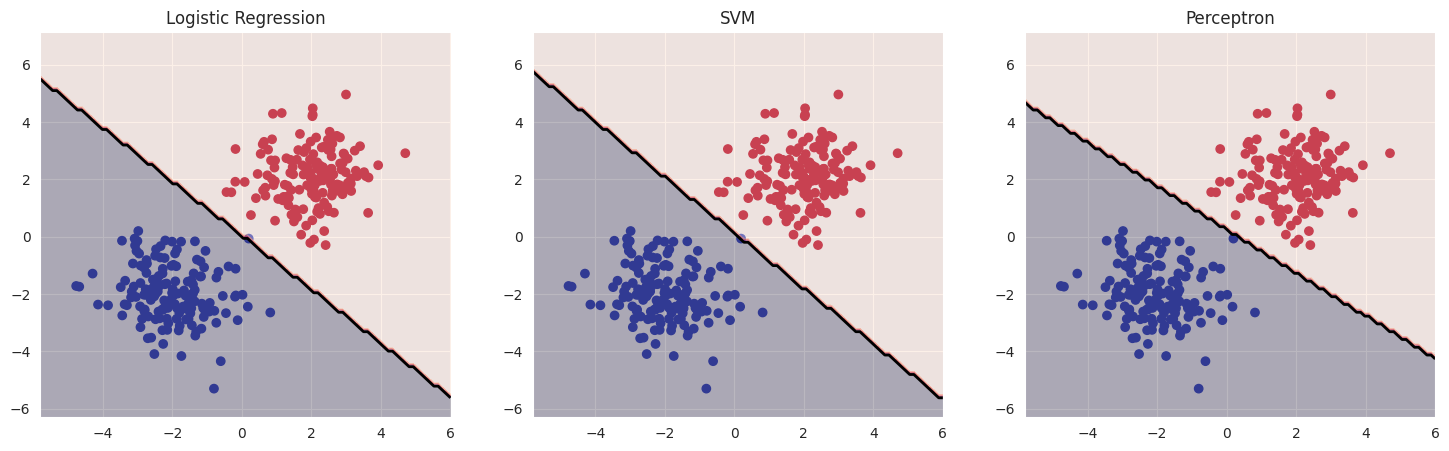

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, (name, r) in zip(axes, res.items()):
    visualisation_train_test(r['model'], x_test, y_test, ax, name)

plt.show()

**Аналіз отриманих результатів**:

1.   Було використано моделі Logistic Regression, SVM, та Perceptron.
2.   Було визначенно 3 параметра для визначення точності це Accuracy, Precision, Recall.
3.   Всі моделі впоралися, але Logistic Regression по параметру precision має 1 пункт нищий ніж інші моделі причина точка 2 класу в центрі графіку.   



**Завдання 2.** Ви маєте набір даних, що містить три класи, які частково перетинаються. Вам необхідно застосувати під цей набір даних мінімум **3  моделі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 2:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- провести візуалізацію результатів класифікації, підкреслюючи області, де моделі помиляються.
- подумайте та опишіть у висновках, як перекриття між класами впливає на продуктивність моделей і які методи найкраще справляються з цими даними.


In [13]:
linear_data_3_classes = pd.read_csv("linear_data_3_classes.csv")

In [14]:
linear_data_3_classes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       900 non-null    float64
 1   y       900 non-null    float64
 2   class   900 non-null    float64
dtypes: float64(3)
memory usage: 21.2 KB


In [15]:
x = linear_data_3_classes[['x', 'y']].values
y = linear_data_3_classes['class'].values

In [16]:
if set(np.unique(y)) == {1.0, 2.0, 3.0}:
    y = (y - 1).astype(int)

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [18]:
res = test_models_and_accuracy(x_train, x_test, y_train, y_test, "multi")
show_accuracy_result(res)


Logistic Regression
Accuracy : 0.90
Precision: 0.90
Recall   : 0.90

SVM
Accuracy : 0.91
Precision: 0.91
Recall   : 0.92

Random Forest
Accuracy : 0.87
Precision: 0.87
Recall   : 0.87


/home/g1den1s/python/AI/ACS/venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


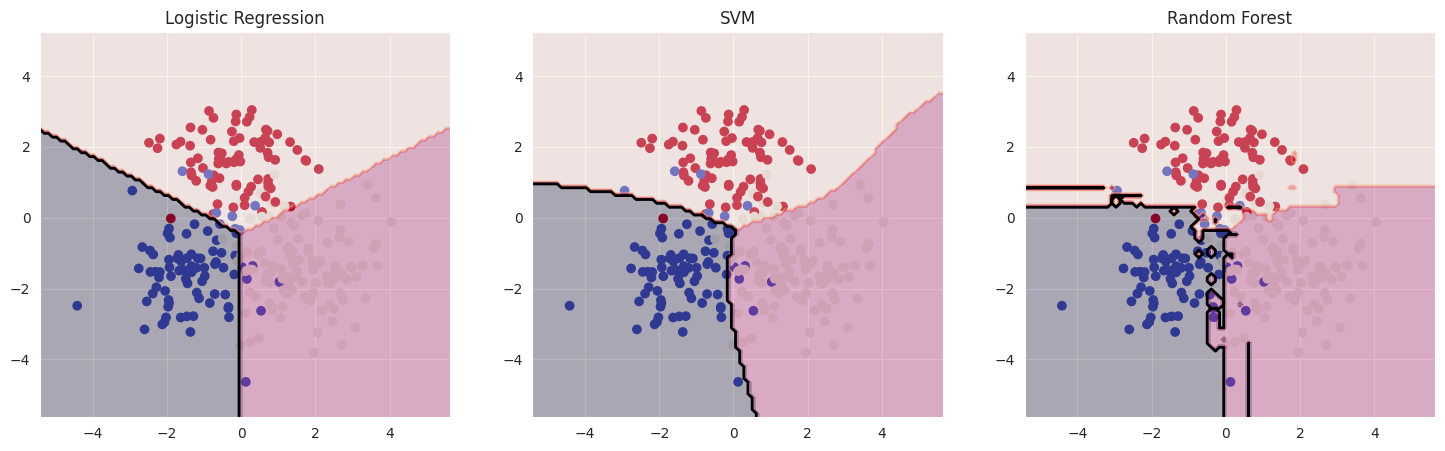

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, (name, r) in zip(axes, res.items()):
    visualisation_train_test(r['model'], x_test, y_test, ax, name)

plt.show()

**Аналіз отриманих результатів**:

1.   Для цього завдання використовувалися Logistic Regression, SVM та Random forest моделі.
2.   Для чизначення точності використовувалися тіє самі параметри Accuracy, Precision та Recall.
3.   Найкращі результати видала модель SVM на другому місці Logistic Regression і на остатньому Random forest з графіку ми бачимо що random forest почав виокремлювати деякі точки щоб виокримити 3 класи але через це що вони мають точки які заходять та інші класи йому не вдалоси це зробити.



**Завдання 3.** Ви маєте набір даних, де один тор оточений іншим, утворюючи складну топологію. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 3:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- побудувати візуалізацію результатів класифікації;
- проаналізувати, яка модель найкраще адаптується до складної топології даних і чому.

In [20]:
torus_data = pd.read_csv("torus_data.csv")

In [21]:
torus_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       1000 non-null   float64
 1   y       1000 non-null   float64
 2   class   1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [22]:
x = torus_data[['x', 'y']].values
y = torus_data['class'].values

In [23]:
if set(np.unique(y)) == {1.0, 2.0}:
    y = (y - 1).astype(int)

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [25]:
res = test_models_and_accuracy(x_train, x_test, y_train, y_test, "multi")
show_accuracy_result(res)


Logistic Regression
Accuracy : 0.49
Precision: 0.49
Recall   : 0.49

SVM
Accuracy : 1.00
Precision: 1.00
Recall   : 1.00

Random Forest
Accuracy : 0.99
Precision: 0.99
Recall   : 0.99


/home/g1den1s/python/AI/ACS/venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


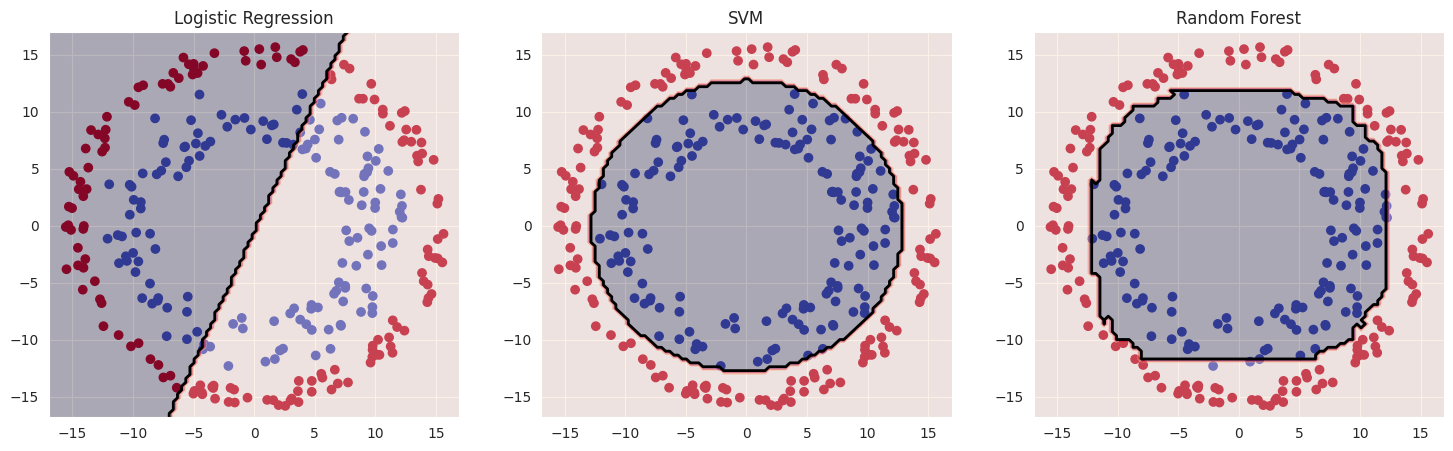

In [26]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, (name, r) in zip(axes, res.items()):
    visualisation_train_test(r['model'], x_test, y_test, ax, name)

plt.show()

**Аналіз отриманих результатів**:

1.   Використовувалися тіж самі моделі Logistic Regression, SVM та Random Forest.
2.   Використовувалися тіж самі параметри для визначення точності Accuracy, Precision, Recall. 
3.   найкращий результат демонструє моделі SVM з досить круглим колом в внутрішньому торі що дозволило охопити всі точки, наступна модель random forest теж непогано відокремила внутрішній тор але більш виглядає квадрат через це не вилілила деякі точки, Logistic regression справилась найгірше з всіх провівши лінію зверху донизу.

**Завдання 4.** Ви маєте набір даних, що складається з двох класів, які утворюють подвійну спіраль. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 4:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- візуалізувати дані та межі класифікації кожної моделі для оцінки їх ефективності.
- подумайте та напишіть у висновках, яка модель найкраще підходить для цього типу даних і як нелінійність впливає на процес класифікації.

In [27]:
spiral_data = pd.read_csv("spiral_dataset.csv")

In [28]:
spiral_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1000 non-null   int64  
 1   x           1000 non-null   float64
 2   y           1000 non-null   float64
 3   class       1000 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 31.4 KB


In [29]:
x = spiral_data[['x', 'y']].values
y = spiral_data['class'].values

In [30]:
if set(np.unique(y)) == {1.0, 2.0}:
    y = (y - 1).astype(int)

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [32]:
res = test_models_and_accuracy(x_train, x_test, y_train, y_test, "multi")
show_accuracy_result(res)

/home/g1den1s/python/AI/ACS/venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(



Logistic Regression
Accuracy : 0.46
Precision: 0.46
Recall   : 0.46

SVM
Accuracy : 0.58
Precision: 0.59
Recall   : 0.58

Random Forest
Accuracy : 0.81
Precision: 0.81
Recall   : 0.81


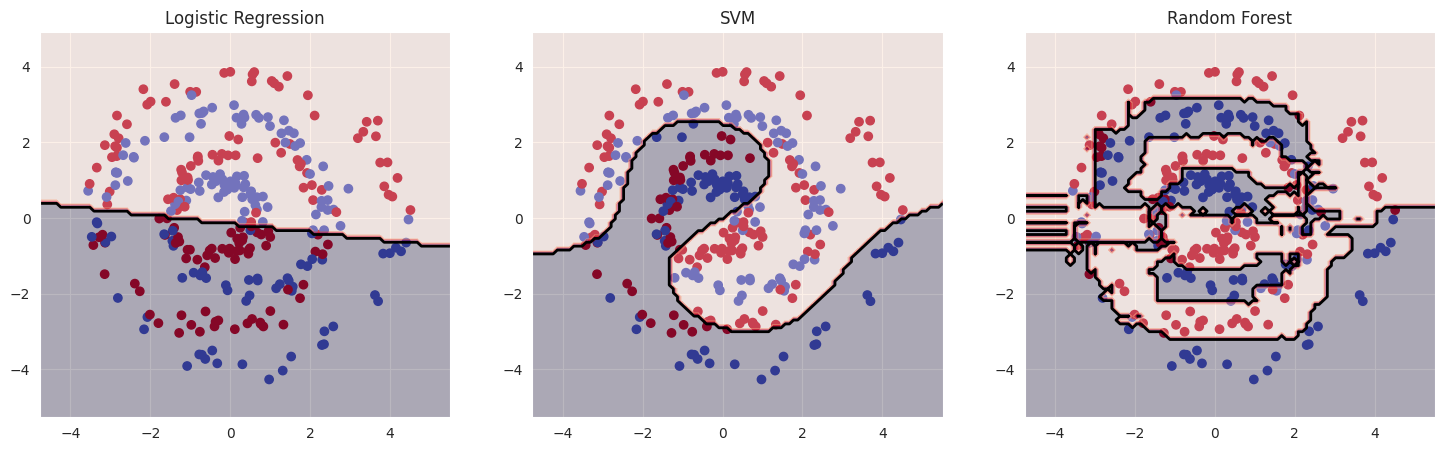

In [33]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, (name, r) in zip(axes, res.items()):
    visualisation_train_test(r['model'], x_test, y_test, ax, name)

plt.show()

**Аналіз отриманих результатів**:

1.   Logistic Regression справилася най гірше з всіх моделей провівши лінію цим охопивши по майше 50% точок одного класу та іншого. 
2.   SVM модель намагалися виокримити деякі масиси точок класу але через те що вони претинаються чи накладаються вийшло кразе ніє попередній моделі.
3.   Random Forest модель впоралась найкраще зі всіх інших моделей але досьть дивним графіком, модель почала виокремлювати масиви точок різних класів де це можливо через це кращі результати виконання.